# EPA-ECHO-DMR
This notebook reads downloaded annual Discharge Monitoring Record (DMR) data from EPA's ECHO fileserver (See: https://echo.epa.gov/tools/data-downloads)

Metadata for the download are here:<br> https://echo.epa.gov/files/echodownloads/ICIS_NPDES_Data_Download.pdf

A link to the download files is here: <br>
https://echo.epa.gov/files/echodownloads/NPDES_by_state_year/

Later this script should include procedures to download the data (vs manually)

In [13]:
#Imports
import pandas as pd
import os
%matplotlib inline

In [2]:
#Pointers to data files (downloaded manually)
dataFolder = '../../Data/EPA_ECHO'
file1=os.path.join(dataFolder,'NC_FY2017_NPDES_DMRS.csv')
file2=os.path.join(dataFolder,'NC_FY2017_NPDES_LIMITS.csv')
file3=os.path.join(dataFolder,'NC_NPDES_EFF_VIOLATIONS.csv')

In [4]:
#Discharge monitoring report data, all data for one year
dfDMRS = pd.read_csv(file1,low_memory=False)

In [5]:
#Display the number of unique records in each columns
dfDMRS.nunique()

ACTIVITY_ID                      1268
EXTERNAL_PERMIT_NMBR             1093
VERSION_NMBR                        5
PERM_FEATURE_ID                  1545
PERM_FEATURE_NMBR                  69
PERM_FEATURE_TYPE_CODE              2
LIMIT_SET_ID                     1553
LIMIT_SET_DESIGNATOR                3
LIMIT_SET_SCHEDULE_ID            1561
LIMIT_ID                        17954
LIMIT_BEGIN_DATE                  114
LIMIT_END_DATE                    119
NMBR_OF_SUBMISSION                  2
NMBR_OF_REPORT                      2
PARAMETER_CODE                    132
PARAMETER_DESC                    132
MONITORING_LOCATION_CODE           10
STAY_TYPE_CODE                      0
LIMIT_VALUE_ID                  24603
LIMIT_VALUE_TYPE_CODE               5
LIMIT_VALUE_NMBR                  861
LIMIT_UNIT_CODE                    26
LIMIT_UNIT_DESC                    26
STANDARD_UNIT_CODE                 10
STANDARD_UNIT_DESC                 10
LIMIT_VALUE_STANDARD_UNITS       1002
STATISTICAL_

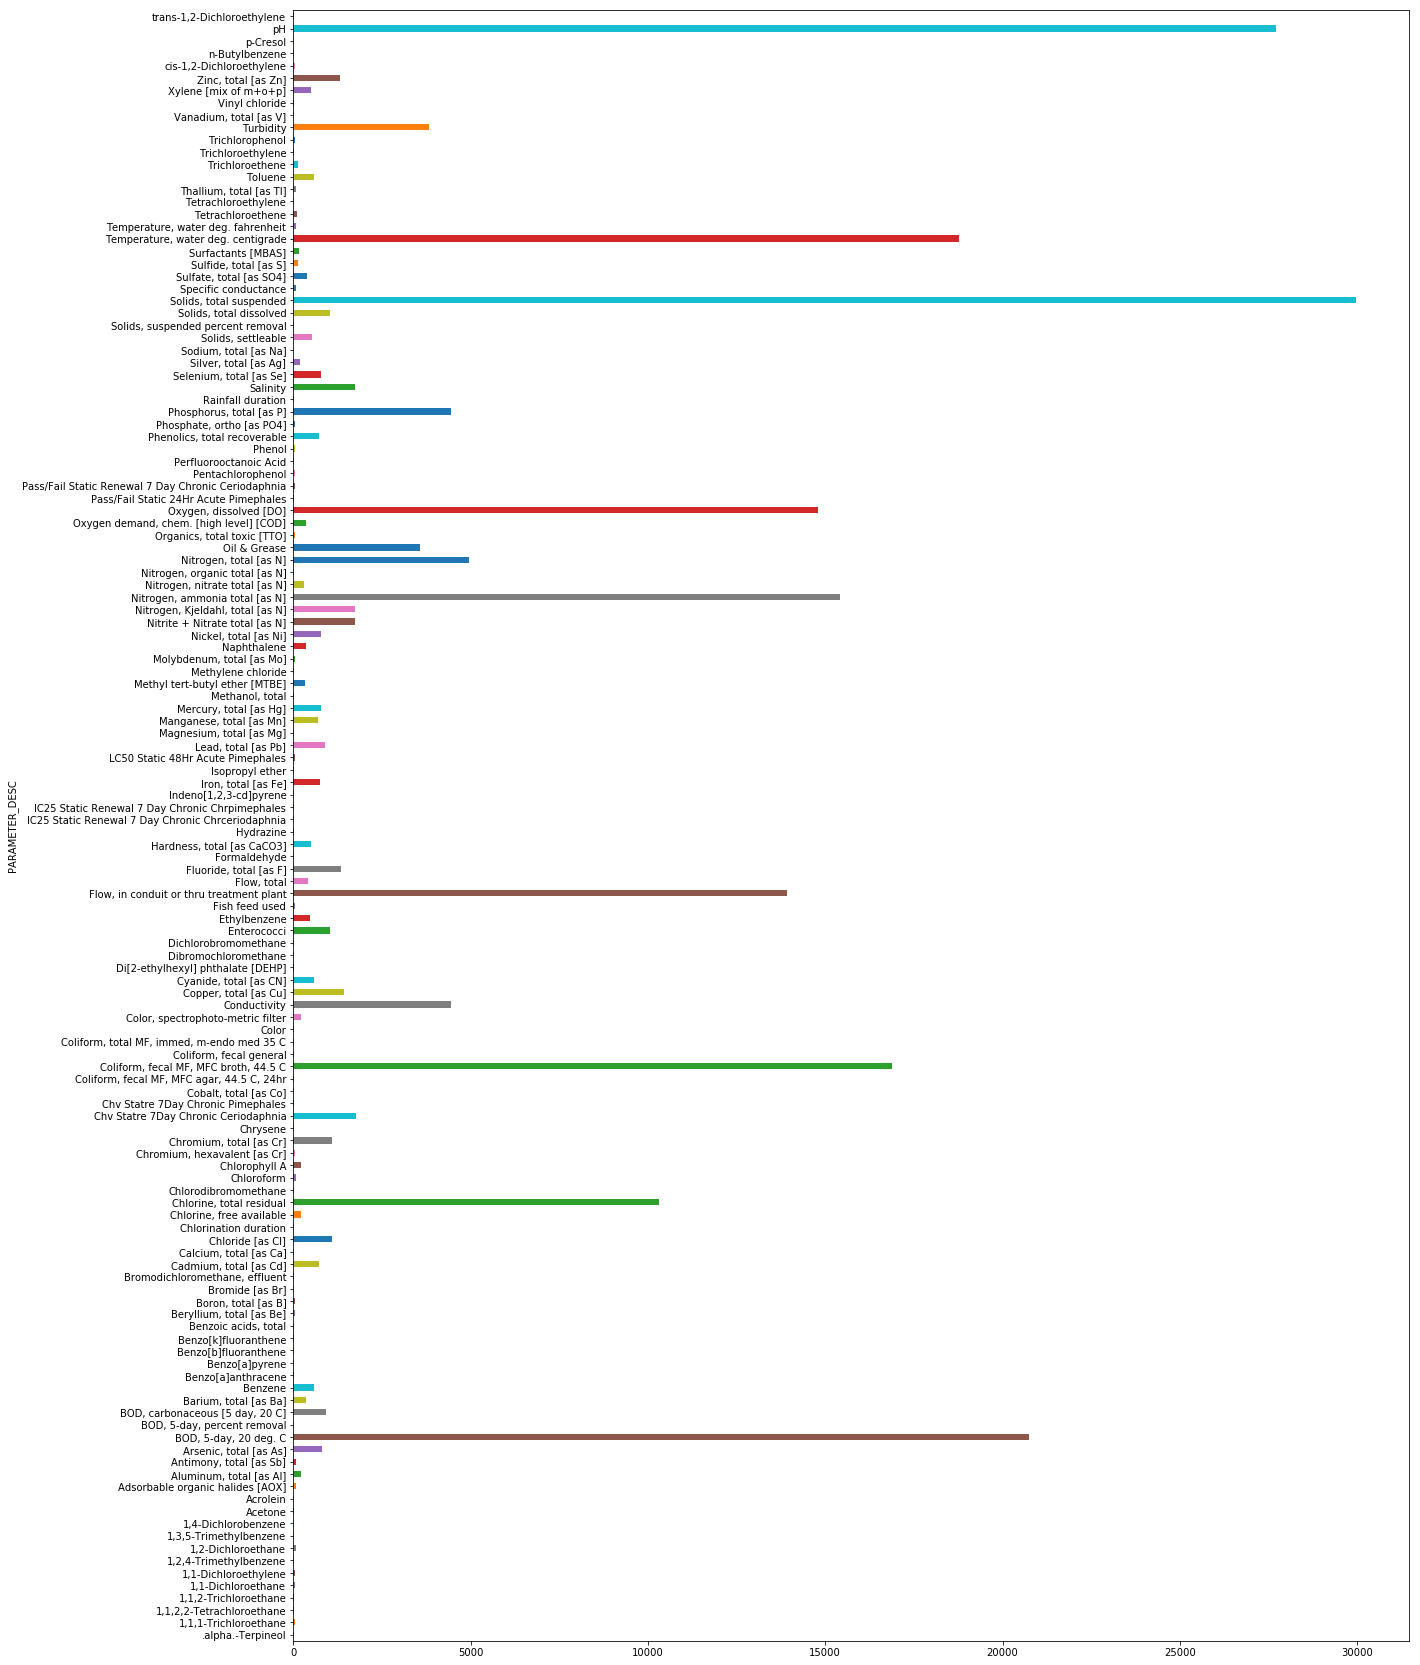

In [22]:
#Plot the number of records for each parameter
dfDMRS.groupby(['PARAMETER_DESC'])['EXTERNAL_PERMIT_NMBR'].count().plot(kind='barh',figsize=(20,30));

In [48]:
#Retrieve just 'Coliform, fecal general'
dfPoop = dfDMRS[dfDMRS.PARAMETER_DESC == 'Turbidity'].copy(deep=True)
dfPoop['DATE'] = pd.to_datetime(dfPoop.MONITORING_PERIOD_END_DATE)
#dfPoop[['EXTERNAL_PERMIT_NMBR','DATE','DMR_VALUE_STANDARD_UNITS']]                 
dfPoopPivot = dfPoop.pivot_table(columns='EXTERNAL_PERMIT_NMBR',
                                 index='DATE',
                                 values='DMR_VALUE_STANDARD_UNITS'
                                )
dfPoopPivot.dropna(how='all',axis=0)

EXTERNAL_PERMIT_NMBR,NC0000078,NC0000175,NC0000353,NC0000361,NC0000400,NC0000795,NC0001422,NC0002852,NC0002861,NC0002879,...,NCG590009,NCG590010,NCG590011,NCG590012,NCG590013,NCG590016,NCG590017,NCG590018,NCG590019,NCG590020
DATE,,,,,,,,,,,,,,,,,,,,,
2016-10-31,11.1,9.200000,17.000000,4.266667,16.433333,NaN,18.8,28.20,4.6,0.74,...,0.70,7.50,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,2.630000,15.266667,7.900000,26.766667,NaN,2.4,18.20,2.7,2.60,...,0.85,13.15,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,14.766667,16.066667,9.466667,24.666667,NaN,1.7,15.10,4.0,2.70,...,1.20,15.10,36.0,NaN,2.7,NaN,NaN,NaN,NaN,NaN
2017-01-31,NaN,65.886667,19.433333,18.333333,19.566667,14.0,2.0,18.10,6.1,0.49,...,1.20,15.45,39.0,4.1,3.7,NaN,NaN,NaN,NaN,NaN
2017-02-28,NaN,5.820000,11.333333,8.266667,13.900000,10.2,4.0,4.16,5.7,1.01,...,0.80,16.20,10.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,6.910000,13.766667,4.733333,11.500000,NaN,2.8,14.20,3.8,4.30,...,2.60,4.25,8.0,2.6,5.6,1.0,NaN,NaN,NaN,NaN
2017-04-30,NaN,65.726667,23.466667,16.700000,21.766667,NaN,2.4,6.05,3.4,1.42,...,1.30,3.85,25.0,1.7,4.1,1.5,NaN,NaN,NaN,NaN
2017-05-31,4.6,60.316667,20.033333,12.000000,25.666667,11.5,2.9,21.30,2.7,2.58,...,3.70,4.30,11.0,3.0,5.8,1.8,NaN,NaN,NaN,NaN
2017-06-30,4.4,31.280000,28.066667,10.866667,19.333333,14.3,1.0,18.50,2.6,1.64,...,5.70,4.90,11.0,1.0,7.5,1.1,NaN,NaN,NaN,NaN


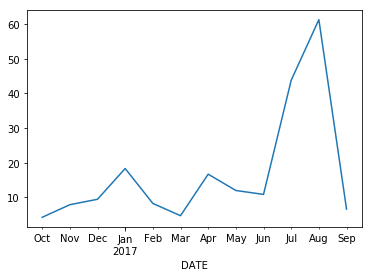

In [44]:
dfPoopPivot['NC0000361'].dropna().plot();